In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 7.4 MB/s 
     |████████████████████████████████| 596 kB 74.5 MB/s 
     |████████████████████████████████| 6.6 MB 40.9 MB/s 
     |████████████████████████████████| 101 kB 11.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


pd.set_option('display.max_colwidth', 100)

In [6]:
from google.colab import files
uploaded = files.upload()

Saving updatedTweets.csv to updatedTweets.csv


In [7]:
data=pd.read_csv("updatedTweets.csv")
data.head()

,id,text,created_at,author_id,in_reply_to_user_id,lang,author,entities,referenced_tweets,media,geo
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df=data[['id','text']]
df.head()

,id,text
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ..."
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ..."
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡..."
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...


In [9]:
#preprocess text
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
324200     True
324201     True
324202     True
324203     True
324204     True
Length: 324205, dtype: bool

In [10]:
df1=df.drop_duplicates()

In [11]:
df1

,id,text
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ..."
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ..."
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡..."
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...
...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA


In [12]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import re
import gensim
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

In [15]:
# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

In [16]:
def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

In [17]:
def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

In [18]:
def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet)
    return tweet

In [19]:
def tokenize_tweets(df):
    """Main function to read in and return cleaned and preprocessed dataframe.
    This can be used in Jupyter notebooks by importing this module and calling the tokenize_tweets() function
    Args:
        df = data frame object to apply cleaning to
    Returns:
        pandas data frame with cleaned tokens
    """

    df['tokens'] = df['text'].apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df

In [23]:
import nltk
nltk.download('omw-1.4')
tokenize_tweets(df1)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Complete. Number of Tweets that have been cleaned and tokenized : 323705


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,text,tokens
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable
...,...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...,jack gibson waandishi kama kitenge huganya kazi chuki kupewa posho kwanza ndio waje kwanza hawaj...
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...,escribí estas notas sobre los orígenes del cooperativismo méxico para intentar avizorar sus gene...
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga,les damos novoa abracito por chunga
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA,quien perdería dirigir chunga


In [24]:
df1

,id,text,tokens
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable
...,...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...,jack gibson waandishi kama kitenge huganya kazi chuki kupewa posho kwanza ndio waje kwanza hawaj...
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...,escribí estas notas sobre los orígenes del cooperativismo méxico para intentar avizorar sus gene...
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga,les damos novoa abracito por chunga
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA,quien perdería dirigir chunga


In [25]:
import re
list_of_hate_words=['mende','sipangwingwi','madoadoa','wabara','wakuja']
df1["Label"]=df1["tokens"].map(lambda x: "Hate" if (("mende" or "sipangwingwi" or "madoadoa" or "wabara" or "wakuja") in x) else 'No Hate')
#df1["Label"]=df1.apply(lambda x: 'Hate' if x==[df1['tokens'].str.contains('mende')|df1['tokens'].str.contains('sipangwingwi')|df1['tokens'].str.contains('wabara')|df1['tokens'].str.contains('madoadoa')|df1['tokens'].str.contains('wakuja') else "No Hate"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df1

,id,text,tokens,Label
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county,No Hate
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha,Hate
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london,No Hate
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca,No Hate
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable,No Hate
...,...,...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...,jack gibson waandishi kama kitenge huganya kazi chuki kupewa posho kwanza ndio waje kwanza hawaj...,No Hate
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...,escribí estas notas sobre los orígenes del cooperativismo méxico para intentar avizorar sus gene...,No Hate
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga,les damos novoa abracito por chunga,No Hate
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA,quien perdería dirigir chunga,No Hate


In [27]:
df1['Label'].value_counts()

No Hate    274039
Hate        49666
Name: Label, dtype: int64

In [28]:
df1['label_category']=df1['Label'].apply(lambda x:'1' if x=='Hate' else '0') #'hate'=1 'not hate'=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df1['label_category'].value_counts()

0    274039
1     49666
Name: label_category, dtype: int64

In [31]:
df1.shape

(323705, 5)

In [32]:
df1.columns

Index(['id', 'text', 'tokens', 'Label', 'label_category'], dtype='object')

In [34]:
df1.head()

,id,text,tokens,Label,label_category
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county,No Hate,0
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha,Hate,1
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london,No Hate,0
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca,No Hate,0
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable,No Hate,0


In [35]:
count = df1.isna().sum()
precentange = df1.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
id,0,0.0
text,0,0.0
tokens,0,0.0
Label,0,0.0
label_category,0,0.0


In [37]:
df1.groupby(['Label'])['Label'].describe()[['count']]

,count
Label,
Hate,49666
No Hate,274039


In [39]:
df1['length'] = df1['tokens'].apply(len)
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,text,tokens,Label,label_category,length
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county,No Hate,0,34
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha,Hate,1,17
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london,No Hate,0,75
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca,No Hate,0,89
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable,No Hate,0,33


In [42]:
temp = df1.groupby('label_category').count()['tokens'].reset_index().sort_values(by='tokens',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label_category,tokens
0,0,274039
1,1,49666


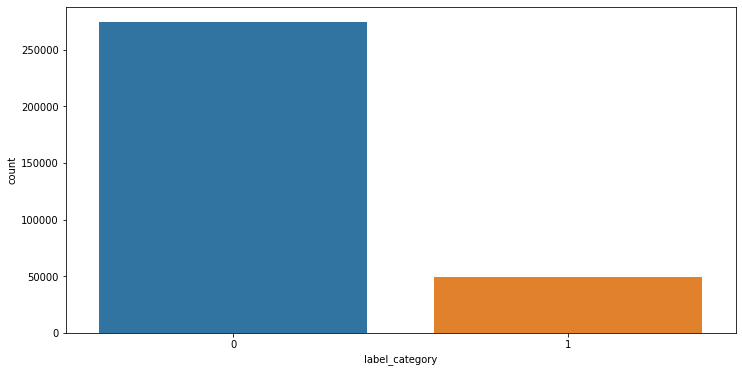

In [43]:
from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='label_category',data=df1)
fig = go.Figure(go.Funnelarea(
    text =temp.label_category,
    values = temp.tokens,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d0f0b5d10>,
      dtype=object)

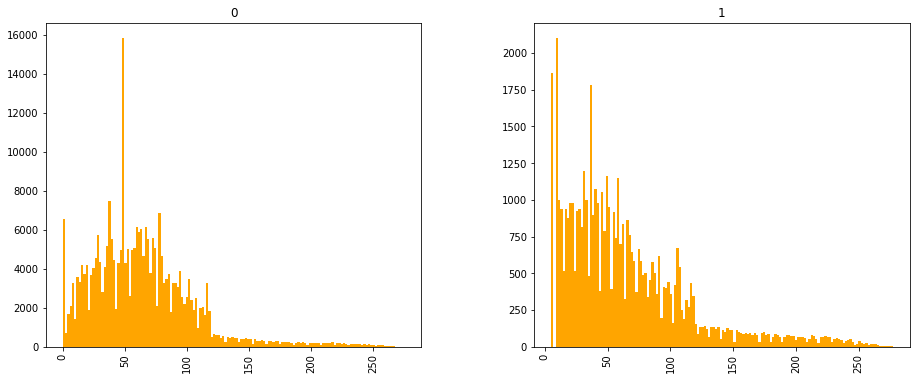

In [44]:
df1.hist(column='length',by='label_category',figsize=(15,6), bins=150,color='orange')

In [52]:
df1

,id,text,tokens,Label,label_category,length
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county,No Hate,0,34
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha,Hate,1,17
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london,No Hate,0,75
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca,No Hate,0,89
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable,No Hate,0,33
...,...,...,...,...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...,jack gibson waandishi kama kitenge huganya kazi chuki kupewa posho kwanza ndio waje kwanza hawaj...,No Hate,0,167
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...,escribí estas notas sobre los orígenes del cooperativismo méxico para intentar avizorar sus gene...,No Hate,0,193
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga,les damos novoa abracito por chunga,No Hate,0,35
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA,quien perdería dirigir chunga,No Hate,0,29


In [53]:
from collections import Counter

plt.rc('font', family='Lohit Devanagari')

results = Counter()
df1.tokens.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('mende', 50968), ('wajackoya', 45820), ('chunga', 37889), ('mawe', 27493), ('hawajui', 26764), ('que', 26314), ('kenya', 25278), ('president', 22426), ('ruto', 22338), ('vote', 18923)]


In [54]:
words = [word for i in df1[df1['label_category'] == 1]['tokens'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[]

In [57]:
words = [word for i in df1[df1['label_category'] == 0]['tokens'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[]

In [58]:
import re,string,unicodedata
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from collections import Counter
import string

import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
# 1. Convert text into vectors using TF-IDF
# 2. Instantiate MultinomialNB classifier
# 3. Split feature and label
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.pipeline import Pipeline


In [59]:
# Name of the BERT model to use
model_name = 'bert-base-uncased'

# Max length of tokens
max_length = 128

# Load transformers config and set output_hidden_states to False
config = BertConfig.from_pretrained(model_name)
#config.output_hidden_states = False

# Load BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
bert = TFAutoModel.from_pretrained(model_name)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [60]:
input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
attention_mask = Input(shape=(max_length,), name='attention_mask', dtype='int32') 
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
x = bert.bert(inputs)

In [61]:
x

TFBaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                                 <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'bert')>),
                                                ('pooler_output',
                                                 <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'bert')>)])

In [62]:
df_la = pd.get_dummies(df1, columns = ['label_category'])
df_la

,id,text,tokens,Label,length,label_category_0,label_category_1
0,1538914496529448960,"RT @AzimioUmoja: Tumaini, Rongai town, Kajiado County 🔥🔥 🔥 🔥 🔥\n\n#Inawezekana \n#AzimioLaUmoja ...",tumaini rongai town kajiado county,No Hate,34,1,0
1,1538914403789471746,@hsriiix @fiziedan Mende gila? Hahaha.,mende gila hahaha,Hate,17,0,1
2,1538914385531482113,"RT @Kenyans: Stickers with famous Kenyan phrases such as 'Mimi Sipangwingwi, Tuma Fare' spotted ...",stickers famous kenyan phrase mimi sipangwingwi tuma fare spot train london,No Hate,75,1,0
3,1538914260260102145,"RT @soyrafillo: Y la chula esta que ya esta acabando de grabar el capitulo 3 de su sitcom👩‍🦱👴, ¡...",chula esta que esta acabando grabar capitulo sitcom que bicha eres conchi que demonia aca,No Hate,89,1,0
4,1538914144224792582,RT @rootsparty01: Mr 6 and Mr kitendawili Wajackoya is unstoppable \n#WajackoyahThe5th https://t...,kitendawili wajackoya unstoppable,No Hate,33,1,0
...,...,...,...,...,...,...,...
323700,1509683872300208139,@GasparyCharlesG @yose_hoza @ahmedkherlid @dr_makame @KMsikivu @unescodar @NuktaTanzania @EUinTZ...,jack gibson waandishi kama kitenge huganya kazi chuki kupewa posho kwanza ndio waje kwanza hawaj...,No Hate,167,1,0
323701,1509683844013723650,Escribí estas notas sobre los orígenes del cooperativismo en México para intentar avizorar sus g...,escribí estas notas sobre los orígenes del cooperativismo méxico para intentar avizorar sus gene...,No Hate,193,1,0
323702,1509683489616154625,@estoriboris Les damos a Novoa y un abracito por chunga,les damos novoa abracito por chunga,No Hate,35,1,0
323703,1509683190042173447,@ElLorko Quien se perdería de dirigir a CHUNGA,quien perdería dirigir chunga,No Hate,29,1,0


In [63]:
train_sentences = df1["tokens"].values
list_classes = ['label_category_0','label_category_1']
train_y = df_la[list_classes].values

In [64]:
#x2 =Dense(512, activation='relu')(x[1])
x2 = GlobalAveragePooling1D()(x[0])
#x3 = Dropout(0.5)(x2)
y =Dense(len(list_classes), activation='sigmoid', name='outputs')(x2)

model = Model(inputs=inputs, outputs=y)
#model.layers[2].trainable = False

# Take a look at the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['attention_mask[0][0]',         
                                thPoolingAndCrossAt               'input_ids[0][0]']              
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                           

In [65]:
optimizer = Adam(lr=1e-5, decay=1e-6)
model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

In [66]:
# Tokenize the input 
x = tokenizer(
    text=list(train_sentences),
    add_special_tokens=True,
    max_length=max_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [2]:
history = model.fit(
    x={'input_ids': x['input_ids'], 'attention_mask': x['attention_mask']},
    #x={'input_ids': x['input_ids']},
    y={'outputs': train_y},
    validation_split=0.1,
    batch_size=32,
    epochs=10)

NameError: ignored